<a href="https://colab.research.google.com/github/harshithard/RNN-Time-series-Anomaly-Detection/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cd drive/My Drive/Distance-Arg-nh1-His-ND1

/content/drive/My Drive/Distance-Arg-nh1-His-ND1


In [ ]:
df = pd.read_csv("Arg-nh1-his-ND1")

In [ ]:
df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360
0,1,3.283429,24.831452,12.606482,25.429577,35.472396,27.031724,16.212501,15.621243,22.847987,40.176670,49.073927,38.739460,38.122908,58.256169,54.212733,35.444775,13.957612,27.187206,26.016926,24.731250,29.374049,38.143461,32.718314,38.923562,61.553504,73.024785,53.335577,34.696988,44.036042,50.612439,18.984481,20.441375,6.988022,14.977495,37.773041,27.791895,24.363826,14.175764,32.565396,...,19.054397,17.826043,19.078089,23.942025,23.797657,33.950760,25.723335,15.171343,41.039071,26.661150,44.878707,41.071645,38.770521,32.086932,53.741214,25.444655,25.609392,31.061549,27.103149,17.345807,32.415412,19.502626,21.606371,40.194670,22.374472,42.331275,28.336903,38.017766,33.125379,33.087605,14.817634,27.653862,34.563616,19.131309,34.289375,55.020858,18.869156,21.899931,24.081094,24.031701
1,2,5.845030,22.824535,12.167420,26.883775,32.526103,25.893407,14.894148,16.653246,20.692841,41.218508,51.857409,38.878186,38.316121,56.821527,54.983438,32.071123,11.708200,26.660601,26.546995,21.779600,27.550666,35.263981,30.277257,35.676047,61.277338,73.651549,51.715267,35.289142,42.810398,51.065937,19.605154,21.007438,9.037110,18.227787,37.865425,29.692019,25.501847,15.140508,33.793098,...,19.158973,19.462734,20.150378,24.585520,26.838799,36.269747,26.591868,14.900032,41.420943,27.902351,46.575854,40.865299,39.887428,31.414013,54.698252,25.308989,26.338007,31.689544,26.996049,18.999844,33.675170,18.922392,21.479716,41.949805,24.851954,43.463393,28.013137,39.494138,32.915828,33.921164,14.904565,28.600305,35.078836,19.718026,36.345171,57.428018,19.508814,21.552608,24.784659,25.351010
2,3,5.897203,22.913120,13.311239,27.026422,33.039549,26.358672,16.168367,18.427590,20.878202,41.743564,53.875111,38.968925,38.905464,57.746042,55.581143,33.216399,13.260199,26.050232,24.968487,24.091977,29.008604,36.193440,28.824389,37.217570,62.126424,74.191672,52.364346,37.087786,43.885012,50.772227,22.750029,20.534604,10.359007,18.248357,37.442873,30.309118,27.598107,16.714090,34.764075,...,18.104855,18.414675,19.215197,23.576574,26.235018,36.483217,25.691849,12.854610,41.926950,28.363830,47.962681,40.866935,40.231180,32.155013,56.031705,25.073109,26.148904,31.449988,27.241457,19.312204,34.150317,19.398210,19.662068,42.688613,25.633319,44.994137,28.397251,40.379752,32.739023,35.965569,15.551952,29.312340,34.500397,21.711720,37.364724,58.745593,19.693762,22.076255,23.890511,23.523218
3,4,8.193157,23.911766,15.050111,25.455817,32.128968,27.278066,15.628363,18.964928,20.617798,41.924875,51.518686,37.862339,40.267648,58.465684,56.733555,32.713914,10.308528,25.094830,26.103071,22.416158,26.275673,33.738280,28.681997,34.158817,60.455802,70.124735,49.320884,35.985918,43.036122,50.913821,22.808556,20.180393,8.093284,17.448767,36.569101,29.477279,25.604816,16.469735,33.344793,...,19.388997,19.530661,18.458559,25.633115,27.624459,34.343159,25.222354,13.803604,42.954576,29.207796,50.477680,41.890365,40.913558,31.011799,55.396121,26.296454,26.788453,30.962466,28.485190,18.810142,32.325109,17.744112,21.001658,44.192718,26.215908,50.703176,33.305996,45.827420,37.945521,37.646640,20.124574,33.259291,39.202710,24.286395,38.219751,59.413190,19.668969,25.763680,24.632685,24.398666
4,5,8.631311,22.849183,13.142029,23.960590,32.331549,25.983966,15.617130,16.881594,20.908719,41.757380,52.108418,39.011885,38.504211,57.704053,57.140196,33.421577,10.864740,25.696286,25.801820,24.024892,26.277776,34.297776,27.651839,35.347161,61.007906,70.392947,51.420022,35.111843,42.488409,50.280718,21.833719,20.067443,8.648981,17.513392,37.353312,29.452806,26.431222,15.577078,34.225547,...,19.080108,19.773327,20.497578,25.441823,28.228561,34.414584,26.926535,12.617928,42.021494,29.689274,50.169685,40.500311,41.273185,30.20

No handles with labels found to put in legend.


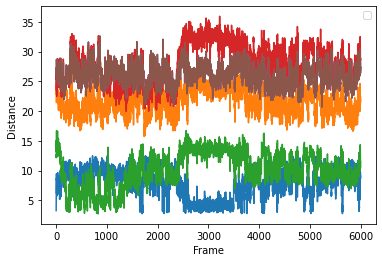

In [ ]:
frame = df.iloc[:,0]
distance1 = df.iloc[:,1]
distance2 = df.iloc[:,2]
distance3 = df.iloc[:,3]
distance4 = df.iloc[:,4]
distance5 = df.iloc[:,5]
distance5 = df.iloc[:,6]
plt.plot(frame, distance1)
plt.plot(frame, distance2)
plt.plot(frame, distance3)
plt.plot(frame, distance4)
plt.plot(frame, distance5)
plt.plot(frame, distance5)
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [ ]:
df = df.iloc[:, 1:].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df= sc.fit_transform(df)

# Creating a data structure with 100 timesteps and 1 output
X_train = []
y_train = []
X_test=[]
y_test=[]
for i in range(100, 5100):
    X_train.append(df[i-100:i, :])
    y_train.append(df[i, :])

for i in range(5100, 6121):
    X_test.append(dataset_scaled[i-100:i, :])
    y_test.append(dataset_scaled[i, :])


X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_train.shape

(5000, 100, 1709)

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 512, return_sequences = True, input_shape = (X_train.shape[1],1709)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1710))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50


ValueError: ignored

In [ ]:
for i in range(5100, 6121):
    X_test.append(dataset_scaled[i-100:i, :])
    y_test.append(dataset_scaled[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
regressor.evaluate(X_train,y_train)

In [ ]:
acc,_=regress

In [ ]:
dataset = pd.read_csv("lysist_data.csv")
len(dataset)

In [ ]:
real_stock_price = dataset.iloc[5000:, 1:].values
dataset_train = dataset.iloc[:5000,1:]
dataset_test = dataset.iloc[5000:,1:]

# Getting the predicted stock price of 2017
dataset_total = dataset.iloc[:,1:]
inputs = dataset_total[4900:].values
inputs = inputs.reshape(-1,1710)
inputs = sc.transform(inputs)
len(inputs)
  

In [ ]:
X_test = []
for i in range(100,1121):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
plt.plot(real_predicted_distance, color = 'red', label = 'Real Distance')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Distance')
plt.title('Distance Prediction')
plt.xlabel('Frmae')
plt.ylabel('Distance')
plt.legend()
plt.show()  

In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,7.990411,21.592514,10.088599,27.989071,30.923991,25.983417,18.777045,19.833484,19.441922,42.079867,53.993872,39.868801,42.149722,55.872621,53.980717,30.095769,8.640595,20.888771,21.755455,30.203364,26.239349,34.356494,30.861780,32.188763,57.939276,68.460297,51.063170,39.663022,46.567581,49.528211,20.153282,16.965085,5.017646,17.454648,36.216913,23.987119,21.391290,15.360934,26.105091,46.374191,...,17.717882,18.064727,18.338225,25.541001,25.917880,34.111359,24.666453,12.480527,35.166566,24.916719,47.033460,41.545001,38.702660,31.924749,43.272760,23.982752,22.030758,26.405625,27.424838,17.551942,31.804816,17.291350,19.450172,36.716644,25.398816,52.071456,39.102682,46.885987,40.134517,27.639646,25.066902,36.704909,43.151731,28.833633,37.910271,61.328491,23.332655,30.735903,21.869755,26.259941
std,2.514433,2.010258,2.864205,3.091848,4.284591,1.765507,1.641983,3.234773,1.912539,1.724511,2.390908,1.937598,2.125217,5.578861,2.991612,2.375892,2.440056,1.879494,1.788903,2.796604,2.177231,2.130774,3.145734,2.045307,2.147004,3.155283,2.428478,2.625533,7.021661,5.498863,1.541832,2.364161,2.631936,1.714614,4.423402,2.453610,2.046479,2.492800,2.565746,2.414928,...,1.333236,1.559352,3.032668,1.168958,1.218916,2.819789,1.184279,1.134481,4.323250,1.718212,4.330757,2.833653,3.935954,3.823679,4.838006,2.638007,4.005453,4.983624,2.800657,2.461799,3.409534,1.726988,1.587420,3.328198,2.794491,3.869260,3.030236,3.315087,3.487613,4.792177,2.870586,2.678355,2.855285,3.057862,2.954328,3.611420,2.807628,2.290078,1.380821,1.893075
min,2.764416,15.743509,2.733058,19.939413,21.916376,20.667049,14.130735,11.623963,14.320060,36.182530,45.721514,33.626093,36.215587,44.110373,46.059174,24.033605,2.779011,15.568087,13.828110,21.026671,20.396610,27.285363,21.687019,26.808077,51.399243,59.271191,43.731905,31.464474,33.883249,38.403055,14.829369,11.931528,2.659588,11.917629,28.370289,18.653635,16.049674,4.848719,20.545867,39.708220,...,14.041119,13.786214,13.679440,21.529948,21.772019,24.686738,20.994325,9.325025,26.120497,19.924646,36.287643,33.564208,29.766829,20.141551,33.627496,16.810068,14.359335,17.454195,20.906279,12.008817,23.563560,11.970715,13.120693,28.697404,15.269781,42.331275,28.013137,38.017766,29.905402,17.865537,14.817634,27.653862,34.500397,19.131309,30.261241,51.047527,16.071129,21.370212,16.168625,18.950224
25%,6.189138,20.058017,8.350699,25.745252,27.578530,24.712028,17.523607,17.663043,18.156448,40.930480,52.378614,38.584272,40.606464,51.486707,51.777892,28.277175,6.853597,19.531329,20.549452,28.521392,24.388786,32.790449,29.759422,30.637259,56.331591,66.273842,49.381311,37.455048,40.806228,44.329672,19.164511,15.379344,3.149447,16.360758,32.767166,22.350010,20.125556,14.072255,24.105205,44.963050,...,16.819403,16.8

In [ ]:
#distances within 10 amstrong
pockets = pd.DataFrame()
for i in range(0,360):
  for j in range(6000):
    if df.iloc[j,i]<=10:
      pockets[i]=df.iloc[:,i]
      break
pockets

,0,2,16,32,37,50,57,58,73,76,78,80,93,95,109,110,113,125,138,140,141,142,147,171,174,176,188,191,201,203,219,234,269,275,296,327
0,3.283429,12.606482,13.957612,6.988022,14.175764,7.675908,11.232826,25.606235,21.983829,13.234330,23.882006,10.498484,21.496487,4.739813,28.241744,17.682376,7.252327,11.238810,10.485669,12.657290,13.358458,11.279514,14.831644,11.249609,16.970989,14.414502,14.703021,12.134598,5.542009,8.154911,14.281785,10.049706,14.598457,16.214624,9.361113,15.171343
1,5.845030,12.167420,11.708200,9.037110,15.140508,9.393285,9.433559,25.061389,22.616783,11.921865,22.486594,10.846042,20.952837,4.902214,27.977479,18.524790,9.164578,11.290430,10.355650,11.358223,15.123654,13.223078,13.697040,12.000220,18.493350,15.701340,16.191709,12.523949,4.748399,9.985777,13.792379,8.718199,15.119651,17.883592,9.558524,14.900032
2,5.897203,13.311239,13.260199,10.359007,16.714090,9.595087,12.627275,25.143047,22.909756,11.345944,22.144303,11.853241,20.361104,5.287050,29.055195,18.151347,8.622591,12.665933,11.198037,10.836101,15.192405,12.468385,12.441452,11.414591,18.511429,15.781112,16.186099,13.137698,4.426790,9.067969,13.910208,8.714729,15.256838,18.934575,9.647870,12.854610
3,8.193157,15.050111,10.308528,8.093284,16.469735,8.758613,11.854124,26.846087,24.443293,11.871694,23.700846,11.184241,20.748813,3.770920,27.668868,18.668885,7.739314,12.861918,9.066119,11.807482,15.442338,11.766537,14.009445,11.864302,19.140045,14.354461,17.125613,12.150729,5.303697,10.085263,13.810360,9.301714,13.483755,19.331913,10.128941,13.803604
4,8.631311,13.142029,10.864740,8.648981,15.577078,12.012113,10.888327,24.788358,19.032735,11.867377,23.861482,12.538150,20.466377,4.654568,26.691940,18.544795,9.220403,13.976907,9.232365,10.781438,13.597475,11.610309,14.560941,11.880853,19.055995,15.248071,16.999795,12.317210,4.254047,10.255547,13.558093,8.387678,16.441257,19.169267,9.984195,12.617928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,9.237903,12.001637,10.567955,3.566255,18.086596,22.336890,21.544423,7.973970,22.717418,13.544909,9.742771,12.136263,10.425242,9.708282,21.740162,14.159989,8.670118,8.607934,13.817202,11.703179,15.958896,14.100527,13.444688,14.428371,13.242290,12.390452,10.829631,17.312234,9.272329,9.523805,13.018900,7.652061,16.626478,13.641128,9.874463,14.347821
5996,7.954838,11.844077,10.230796,3.296679,17.514940,22.797756,22.762474,8.498905,24.825553,12.293036,10.699693,12.489862,9.813249,9.922834,18.833711,16.110015,11.851938,8.711775,13.666110,12.441422,15.269279,13.590724,12.573282,14.435918,12.855769,14.261520,11.500668,19.136822,10.352008,8.188931,13.343329,7.133792,18.430703,13.451996,9.700897,13.496150
5997,8.926576,10.401641,10.200058,2.968522,18.127082,21.471145,22.522933,9.509660,22.940259,13.919550,11.254799,12.922719,10.860278,9.446870,21.506235,15.867585,11.283730,7.739683,13.452072,11.405901,15.408210,14.095738,13.442712,14.969250,12.843815,13.178095,11.740973,17.613771,10.841074,9.238277,13.073505,6.207529,15.486912,13.977573,9.459230,14.404891
5998,8.674670,10.812284,10.993809,3.321943,16.724742,21.264113,21.494704,8.019760,21.311942,13.638742,10.971824,12.638448,10.467069,9.068569,21.891579,14.841597,8.116386,8.116732,10.570348,10.190586,16.607518,13.866851,14.951161,14.877456,14.359447,13.453218,11.109937,18.213522,8.973741,8.513812,14.173811,5.730497,17.863175,12.402845,9.484205,14.258764


In [ ]:
l=[]
for j in range(36):
  count=0
  for i in range(6000):
    if pockets.iloc[i,j]<=10:
      count+=1
  l.append(count)
l

[4414,
 3057,
 4139,
 5510,
 249,
 26,
 19,
 2773,
 36,
 140,
 1042,
 8,
 172,
 4193,
 22,
 3,
 4078,
 4179,
 445,
 1812,
 75,
 707,
 1,
 234,
 129,
 12,
 6,
 756,
 5179,
 5689,
 19,
 5382,
 103,
 78,
 4790,
 26]

In [ ]:
frames=[]
for i in range(len(l)):
  if l[i]>=3000:
    frames.append(i)

print(len(frames))
print(frames)

11
[0, 1, 2, 3, 13, 16, 17, 28, 29, 31, 34]


In [ ]:
j=0
pocket_numbers=[]
for i in pockets.columns:
  if j in frames:
    pocket_numbers.append(i)
  j+=1
pocket_numbers

[0, 2, 16, 32, 95, 113, 125, 201, 203, 234, 296]

In [ ]:
plt.scatter(x,l)
plt.show

In [ ]:
pip install ruptures

     |████████████████████████████████| 61kB 1.9MB/s 


In [ ]:
results=[]
import ruptures as rpt

for i in range(len(frames)):
  d= pockets.iloc[:,frames[i]]
  points=d.values.reshape(-1,1)
        
  #RUPTURES PACKAGE
  #Changepoint detection with the Pelt search method
  model="rbf"
  algo = rpt.Pelt(model=model).fit(points)
  result= algo.predict(pen=20)
  print(result)

#rpt.display(points, result, figsize=(10, 6))
#plt.title('Change Point Detection: Pelt Search Method')
#plt.show()  

[95, 275, 585, 1645, 1725, 1850, 1960, 2090, 2225, 2395, 2605, 3500, 3780, 4030, 4110, 4660, 4865, 5085, 5145, 5215, 6000]
[95, 190, 275, 745, 1000, 1135, 1345, 1435, 2400, 3480, 3780, 4045, 4105, 4420, 4510, 4870, 5085, 5145, 5215, 6000]
[55, 490, 575, 705, 825, 1035, 1205, 1520, 1770, 2135, 2430, 2475, 3170, 3210, 3750, 3925, 5325, 5740, 5900, 6000]
[185, 665, 895, 1215, 1270, 1360, 1545, 1675, 1770, 1820, 2605, 3550, 6000]
[140, 540, 870, 1045, 1840, 2130, 2790, 3060, 3465, 3770, 4305, 5375, 6000]
[135, 280, 690, 1030, 1575, 1775, 2560, 2595, 3320, 3360, 3830, 3895, 4670, 4720, 5010, 5085, 5335, 5610, 6000]
[155, 550, 1330, 1710, 1855, 1915, 2020, 2250, 2295, 2680, 3215, 3415, 4150, 4235, 5250, 5510, 5640, 5825, 6000]
[85, 150, 195, 525, 695, 780, 910, 1075, 2715, 3145, 3490, 3725, 3865, 4060, 4785, 4930, 5145, 5390, 5450, 5535, 5685, 5850, 6000]
[530, 615, 690, 780, 980, 3725, 4055, 4775, 4825, 5450, 5535, 5695, 5855, 6000]
[395, 490, 560, 705, 1370, 1700, 1850, 3180, 3580, 4515, 4

In [ ]:
result

[6000]

In [ ]:
import ruptures as rpt
for i in range(1,len(frames)):
  d=pockets.iloc[:,frames[i]]
  points=d.values.reshape(-1,1)
      
  #RUPTURES PACKAGE
  #Changepoint detection with the Pelt search method
  model="rbf"
  algo = rpt.Pelt(model=model).fit(points)
  result = algo.predict(pen=20)
  print(result)
#rpt.display(points, result, figsize=(10, 6))
#plt.title('Change Point Detection: Pelt Search Method')
#plt.show()  

[805, 1660, 3980, 4085, 6121]
[90, 590, 665, 715, 1075, 1465, 1800, 2040, 2245, 2350, 3370, 3405, 6121]
[105, 615, 720, 1125, 1230, 2245, 2345, 2630, 2935, 3070, 3370, 3470, 4330, 4475, 4880, 5510, 6040, 6121]
[205, 305, 515, 815, 1125, 1225, 2040, 5775, 5815, 6121]
[2355, 5050, 6121]
[410, 715, 1635, 1820, 2245, 2395, 3365, 3570, 3930, 4285, 5050, 5410, 6121]
[105, 515, 1480, 1545, 2140, 2515, 2605, 3265, 4540, 4710, 5610, 5815, 6121]


In [ ]:
import ruptures as rpt
for i in range(7,len(frames)):
  d=pockets.iloc[:,frames[i]]
  points=d.values.reshape(-1,1)
      
  #RUPTURES PACKAGE
  #Changepoint detection with the Pelt search method
  model="rbf"
  algo = rpt.Pelt(model=model).fit(points)
  result = algo.predict(pen=20)
  print(result)
#rpt.display(points, result, figsize=(10, 6))
#plt.title('Change Point Detection: Pelt Search Method')
#plt.show()  

[105, 515, 1480, 1545, 2140, 2515, 2605, 3265, 4540, 4710, 5610, 5815, 6121]
[720, 5935, 6121]
[3950, 4795, 5100, 5920, 6121]
[105, 1120, 1225, 1475, 2260, 2345, 3900, 5870, 6121]
[55, 1555, 2325, 2845, 6121]


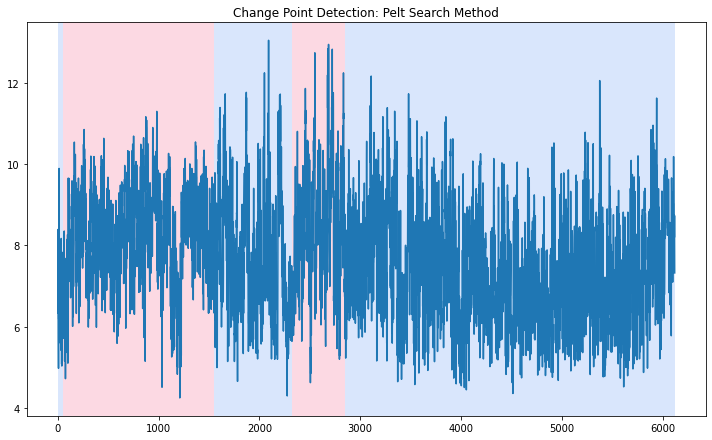

In [ ]:
import ruptures as rpt

d=pockets.iloc[:,frames[10]]
points=d.values.reshape(-1,1)
     
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method

result=[55, 1555, 2325, 2845, 6121]


rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 